## Environmental Data Analysis

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans

Imported CO2 environmental indicators dataset from Kaggle can be found at https://www.kaggle.com/datasets/ruchi798/global-environmental-indicators

### Section 1: Carbon Dioxide Emissions

In [3]:
CO2_Emissions = pd.read_csv(r"C:\Users\Isaiah Erb\Documents\Work Portfolio\Environmental\co2_emissions_kt_by_country.csv")
CO2_Emissions_Pivot = CO2_Emissions.pivot(index='country_name', columns='year', values='value')
CO2_Emissions_Pivot = CO2_Emissions_Pivot.sort_index()
co2_df_by_year = CO2_Emissions_Pivot
co2_df_by_year

year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,942.419,...,7110.000,8930.000,8080.000,5990.000,4880.000,5950.000,5300.000,4780.000,6070.000,6080.000
Africa Eastern and Southern,118545.901,123758.903,128093.898,132810.333,144345.352,155803.780,157932.257,165066.040,174004.893,182939.984,...,529639.997,521760.010,543439.999,565430.013,587699.992,574029.995,578510.016,587509.992,590040.005,603030.016
Africa Western and Central,8760.463,9376.519,9710.216,11540.049,13985.938,19827.469,21246.598,21239.264,16527.169,23743.825,...,165489.998,171780.000,177939.996,193299.998,201680.002,198410.002,206030.001,204740.000,211719.999,220740.000
Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,3245.295,...,4450.000,4850.000,4360.000,4440.000,4820.000,4620.000,4480.000,5140.000,5110.000,4830.000
Algeria,6160.560,6065.218,5669.182,5427.160,5650.847,6596.933,8430.433,8441.434,9061.157,11276.025,...,114180.000,120790.001,134929.993,139020.004,147740.005,156270.004,154910.004,158339.996,165539.993,171250.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2035.185,2247.871,2200.200,2438.555,2838.258,3006.940,3234.294,NaN,NaN,NaN
World,9463838.500,9423934.424,9732505.890,10274503.991,10820253.007,11402575.202,11988321.416,12413351.890,13087346.571,13976005.563,...,31043476.982,32021108.257,32460316.860,33119382.990,33198729.820,32995536.020,33018556.399,33514537.911,34289350.661,34344006.072
"Yemen, Rep.",58.672,73.340,69.673,80.674,99.009,102.676,99.009,102.676,128.345,135.679,...,25430.000,22950.001,21010.000,27830.000,27430.000,13550.000,10850.000,10010.000,9720.000,11100.000


#### Carbon Dioxide Emissions (World)

In [4]:
co2_df_world = CO2_Emissions[CO2_Emissions['country_name'] == "World"]
co2_df_world.set_index('year',inplace = True)

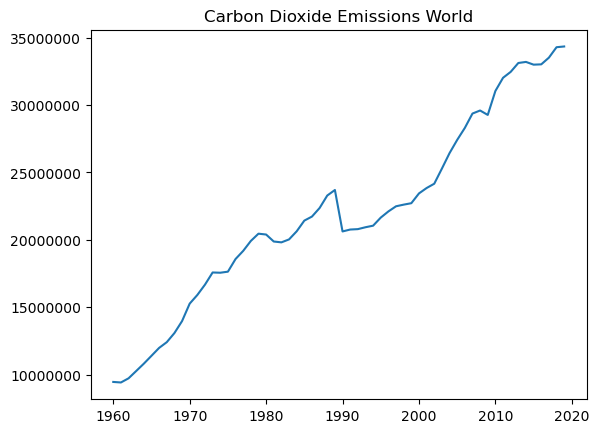

In [5]:
plt.plot(co2_df_world.index,co2_df_world['value'])
plt.title("Carbon Dioxide Emissions World")
plt.yscale('linear')
plt.ticklabel_format(style='plain', axis='y')

Carbon emissions have gone up recently due to the use of fossil fuels - coal, oil, and gas. These fuels being burned and used for energy is the central cause of the release of carbon dioxide into the atmosphere. Due to the collapse of the Soviet Union and Eastern European economies, which are based heavily on coal, carbon emissions dropped in 1990, only to be picked bac up by around 2005. Currently, carbon dioxide emissions are down 14% due to public policy and heightened awareness. According to the Union of Concerned Scientists, the best way to decrease carbon emissions is by planting new forests and restoring old ones. At the individual level, the best way to decrease your carbon footprint is to conserve energy and avoid waste.

#### Carbon Emissions in Leading Countries 

Let's take a look at the carbon dioxide emssions in some of the leading countries, the United States, India, Japan, and China.

In [10]:
countries = ['China','United States','India','Russia','Japan']
co2_df_leading_countries = CO2_Emissions[CO2_Emissions['country_name'].isin(countries)]
co2_df_leading_countries.set_index('year',inplace = True)

C:\Users\Isaiah Erb\AppData\Local\Temp\ipykernel_39188\3370029983.py:2: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  sns.lineplot(x = 'year', y = 'value', hue = 'country_name', palette = sns.color_palette("Paired"),


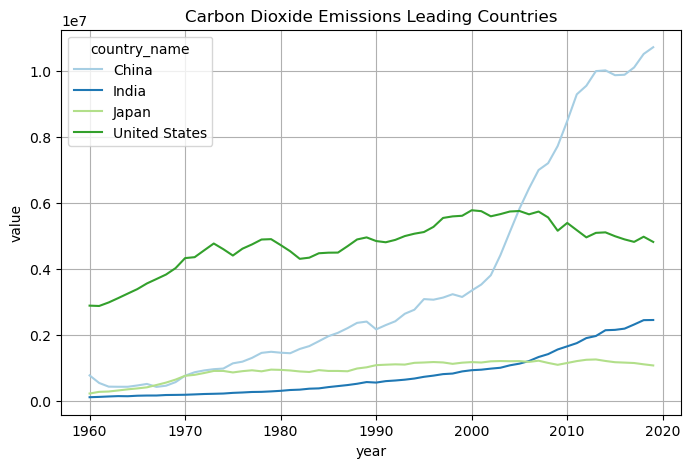

In [11]:
plt.figure(figsize=(8,5))
sns.lineplot(x = 'year', y = 'value', hue = 'country_name', palette = sns.color_palette("Paired"),
            data = co2_df_leading_countries)
plt.title("Carbon Dioxide Emissions Leading Countries")
plt.grid()
plt.show()

Chinas emissions have skyrocketed since 2000, while Japan and the US have been on a slow yet steady decline starting around the same time. The United States has been a world leader in carbon emissions due to the large population and heavy use of automobiles, but since the Clean Air Acts in 1967 and 1990 as well as additional legislature, emissions have gone down significantly.

### Section 2: Forest Areas and Deforestation

In [69]:
df_forest = pd.read_csv(r"C:\Users\Isaiah Erb\Documents\Work Portfolio\Environmental\Forest Area.csv")
df_forest.rename(columns={'Forest Area as a Proportion of (%)\n Land Area, 2020': 'Forest Area Proportion'})
df_forest

,CountryID,Country and Area,"Forest Area, 1990 (1000 ha)","Forest Area, 2000 (1000 ha)","Forest Area, 2010 (1000 ha)","Forest Area, 2015 (1000 ha)","Forest Area, 2020 (1000 ha)","Total Land Area, 2020 (1000 ha)","Forest Area as a Proportion of (%)\nTotal Land Area, 2020","Deforestation, \n2015-2020 (1000 ha/year)","Total Forest Area \nAffected by Fire, 2015 (1000 ha)"
0,NaN,WORLD,4236433.420,4158049.520,4106316.940,…,4058930.810,13003000.000,31.130,10200,98040
1,4.000,Afghanistan,1208.440,1208.440,1208.440,1208.44,1208.440,65286.000,1.850,...,...
2,8.000,Albania,788.800,769.300,782.070,789.19,788.900,2740.000,28.790,...,...
3,12.000,Algeria,1667.000,1579.000,1918.000,1956,1949.000,238174.000,0.820,5.4,...
4,16.000,American Samoa,18.070,17.730,17.430,17.28,17.130,20.000,85.650,...,0
5,20.000,Andorra,16.000,16.000,16.000,16,16.000,47.000,34.040,...,...
6,24.000,Angola,79262.780,77708.610,72158.000,69382.69,66607.380,124670.000,53.430,...,...
7,660.000,Anguilla,5.500,5.500,5.500,5.5,5.500,9.000,61.110,...,...
8,28.000,Antigua and Barbuda,10.110,9.450,8.780,8.45,8.120,44.000,18.450,...,...
9,32.000,Argentina,35204.000,33378.000,30214.000,29097,28573.000,273669.000,10.440,134.8,128


In [57]:
df_forest_sorted = df_forest.sort_values(by = 'Forest Area, 2020 (1000 ha)', ascending = False)
df_forest_sorted_subset = df_forest_sorted.loc[1:5, ['Country and Area','Forest Area, 1990 (1000 ha)','Forest Area, 2000 (1000 ha)','Forest Area, 2010 (1000 ha)',
                                                     'Forest Area, 2015 (1000 ha)','Forest Area, 2020 (1000 ha)']]
df = df_forest_sorted_subset.head()

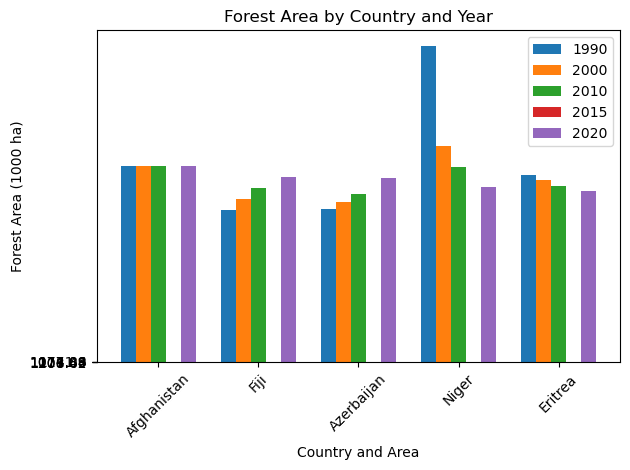

In [58]:
countries = df['Country and Area']
forest_area_1990 = df['Forest Area, 1990 (1000 ha)']
forest_area_2000 = df['Forest Area, 2000 (1000 ha)']
forest_area_2010 = df['Forest Area, 2010 (1000 ha)']
forest_area_2015 = df['Forest Area, 2015 (1000 ha)']
forest_area_2020 = df['Forest Area, 2020 (1000 ha)']

# Set the position of bars on the x-axis
x = range(len(countries))

# Plotting the bars
plt.bar(x, forest_area_1990, width=0.15, label='1990')
plt.bar([i + 0.15 for i in x], forest_area_2000, width=0.15, label='2000')
plt.bar([i + 0.3 for i in x], forest_area_2010, width=0.15, label='2010')
plt.bar([i + 0.45 for i in x], forest_area_2015, width=0.15, label='2015')
plt.bar([i + 0.6 for i in x], forest_area_2020, width=0.15, label='2020')

# Customize the plot
plt.xlabel('Country and Area')
plt.ylabel('Forest Area (1000 ha)')
plt.title('Forest Area by Country and Year')
plt.xticks([i + 0.3 for i in x], countries, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

Afghanistan has the most consistent forest area, and was the world leader in forest area in 2020. Fiji and Azerbajan are all on the rise, and Etriea's forest area is falling slowly. Niger has the highest 1990 forest area and is still a top contender in 2020, although it's has significantly decreased since then.

### Section 3: Public Water Supply

In [26]:
df_water = pd.read_csv(r"C:\Users\Isaiah Erb\Documents\Work Portfolio\Environmental\Public Water Supply.csv")

In [27]:
del df_water['Footnotes']
del df_water['Footnotes.1']
del df_water['Footnotes.2']

In [28]:
del df_water['latest year available']

In [29]:
del df_water['latest year available.1']

In [30]:
del df_water['Net freshwater supplied by water supply industry per capita (m3)']
del df_water['Net freshwater supplied by water supply industry per capita connected (m3)']

In [31]:
del df_water['CountryID']

In [32]:
df_water

,Country,Net freshwater supplied by water supply industry (mio m3),Total population supplied by water supply industry (%)
0,Albania,920,78
1,Algeria,3548,98
2,Andorra,6.01,100
3,Angola,…,15.3
4,Antigua and Barbuda,3.64,82
...,...,...,...
124,Uzbekistan,1639.06,81.4
125,Venezuela (Bolivarian Republic of),28267.8,95
126,Viet Nam,…,31.97
127,Yemen,99.3,18.6


In [33]:
df_water['Total population supplied by water supply industry (%)'] = pd.to_numeric(df_water['Total population supplied by water supply industry (%)'], errors='coerce')

# Create a new DataFrame and add the column to it
data_for_graph = pd.DataFrame()
data_for_graph['Values'] = df_water['Total population supplied by water supply industry (%)'].nsmallest(10)
data_for_graph['Country'] = df_water['Country']

In [34]:
data_for_graph

,Values,Country
3,15.300,Angola
127,18.600,Yemen
15,19.000,Bermuda
27,30.000,Central African Republic
126,31.970,Viet Nam
24,43.900,Cameroon
51,48.000,Guinea
20,48.400,British Virgin Islands
104,48.560,Senegal
45,50.000,Gambia


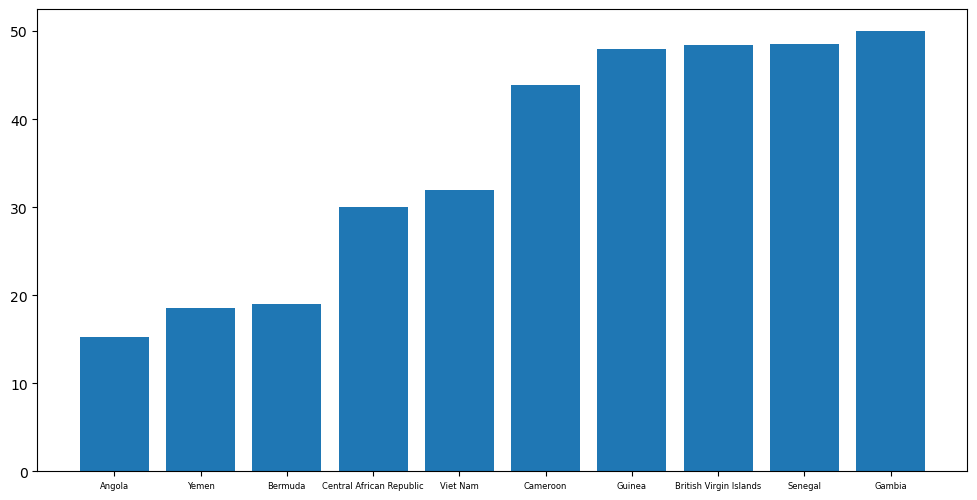

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(data_for_graph['Country'], data_for_graph['Values'])
plt.xticks(fontsize=6)
plt.show()

Graphed above are the 10 countries with the least access to water, ranging from 50% to 15% supplied. Five of the countries are located in Africa, the rest in the Middle East, South America, and Asia. In Angola, Yemen, and Bermuda less than 20% of the population is being supplied with freshwater. In Angola, there is a lack of access to clean freshwater, the climate being hot and dry and water being hard to find in the first place, let alone clean freshwater. Just about 15% of the population is being satisfied at the moment, the lowest out of any country in the world. Yemen faces a different set of issues. The lack of freshwater in Yemen is due to a rapid population increase, misguided agricultural development and policies, a lack of law enforcement to regulate water use, and a high vulnerability to climate change. Moving on to Bermuda, the issue here is a lack of freshwater. Because it's surrounded by oceanic waters, even the lakes and wells are brackish, meaning salty. 